In [ ]:
import PIL
import os
from PIL import Image

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import glob

In [ ]:
import imutils

In [ ]:
#repeat for each folder dropsy, finrot and tumor
f = r'/content/drive/MyDrive/fyp/coding seyes/training/tumor'

In [ ]:
#resize 
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((1000,1000))
    img.save(f_img)

In [ ]:
figsize = (15, 15)

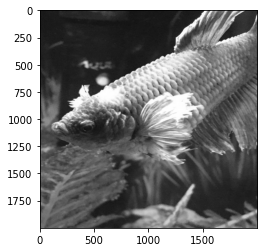

In [ ]:
image = plt.imread('/content/drive/MyDrive/fyp/bettafishdisease/dropsy/a42.jpg')
plt.imshow(image)
# rgb to grayscale
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(grey, cv2.COLOR_BGR2RGB))

In [ ]:
#adaptive histogram equalization (image contract enhance sharpeness)
bins_edges_min_max = [0, 256]
num_bins = 256
bin_count, bins_edges = np.histogram(image, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

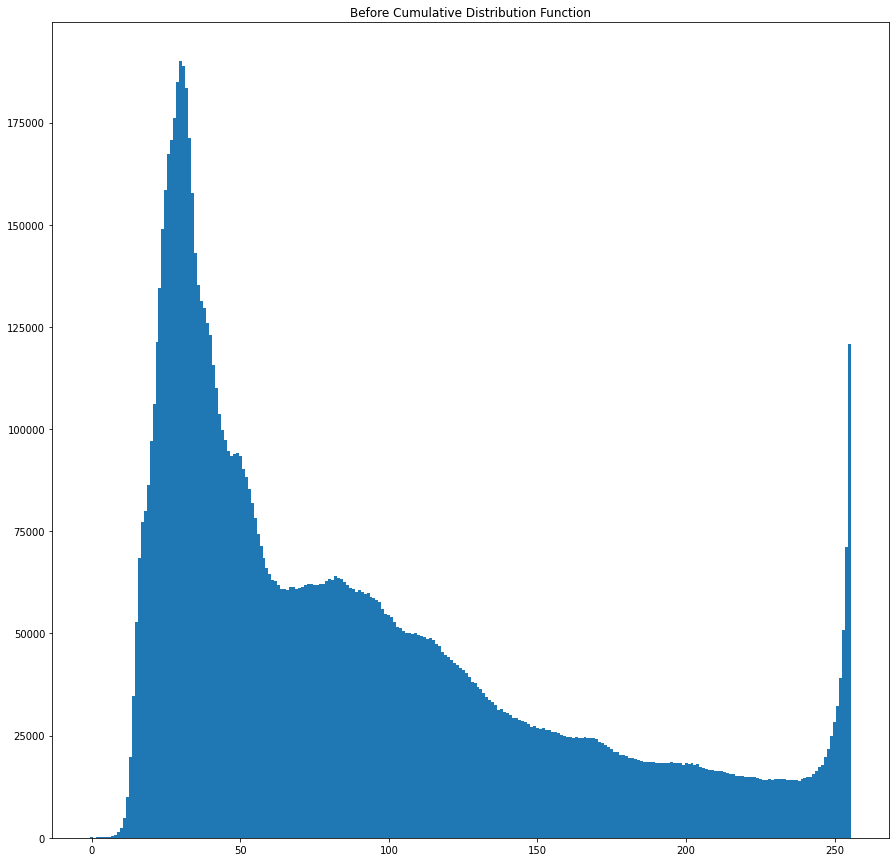

In [ ]:
def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


draw_hist(bins_start, bin_count)
plt.title("Before Cumulative Distribution Function")
plt.show()

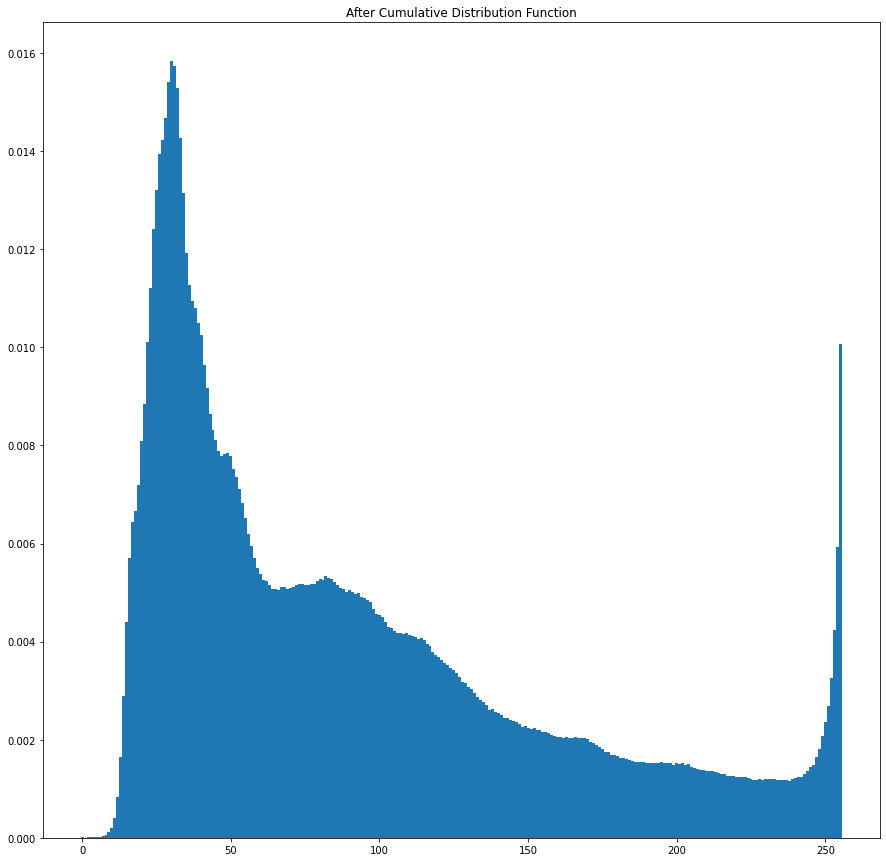

In [ ]:
pdf = bin_count / np.sum(bin_count)

draw_hist(bins_start, pdf)
plt.title("After Cumulative Distribution Function")
plt.show()

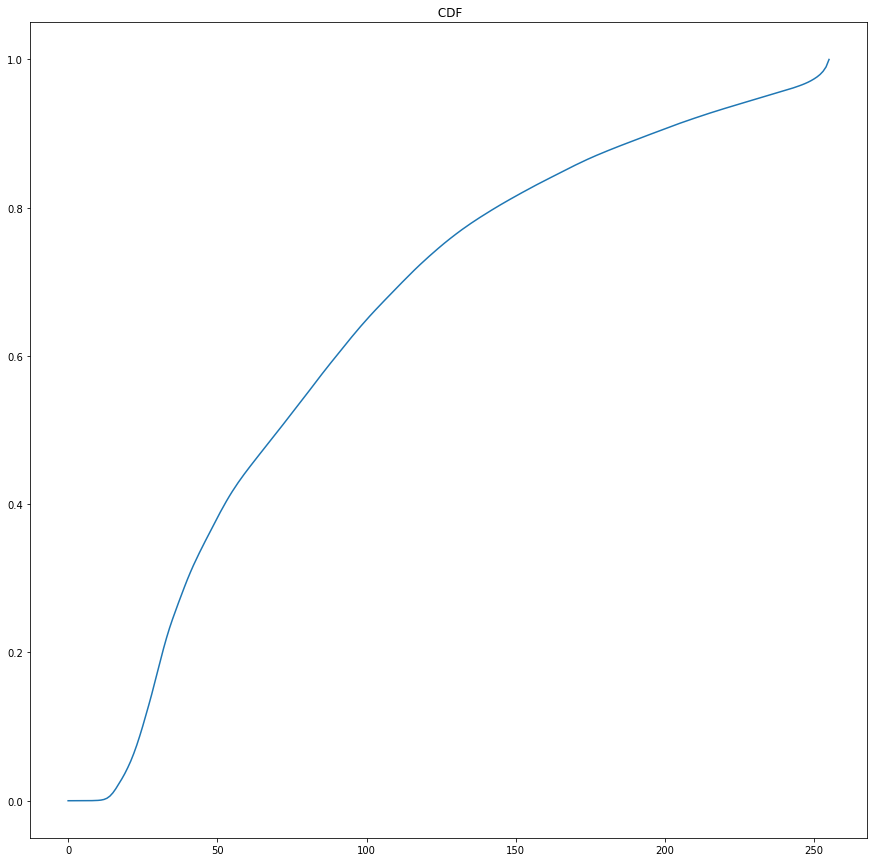

In [ ]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title(" CDF")
plt.show()

In [205]:
#image augumentation repeat for each folder because dont know to do looping
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range = 4,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))
    
# Load 
img = load_img('/content/drive/MyDrive/fyp/coding seyes/training/dropsy/a75.jpg')

# Convert array
x = img_to_array(img)

#reshape
x = x.reshape((1, ) + x.shape) 
   
#save augment image new folder
i = 0
for batch in datagen.flow(x, batch_size = 1,
                          save_to_dir ='/content/drive/MyDrive/fyp/coding seyes/training/dropsy', 
                          save_prefix ='image', save_format ='jpg'):
    i += 1
    if i > 6:
        break

FileNotFoundError: ignored

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# original image
#f = cv2.imread('original image.png', 0)
equ = cv2.equalizeHist(f)

plt.imshow(equ, cmap='gray')
plt.axis('off')
plt.show()

hist, bins = np.histogram(equ.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(equ.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

TypeError: ignored